# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

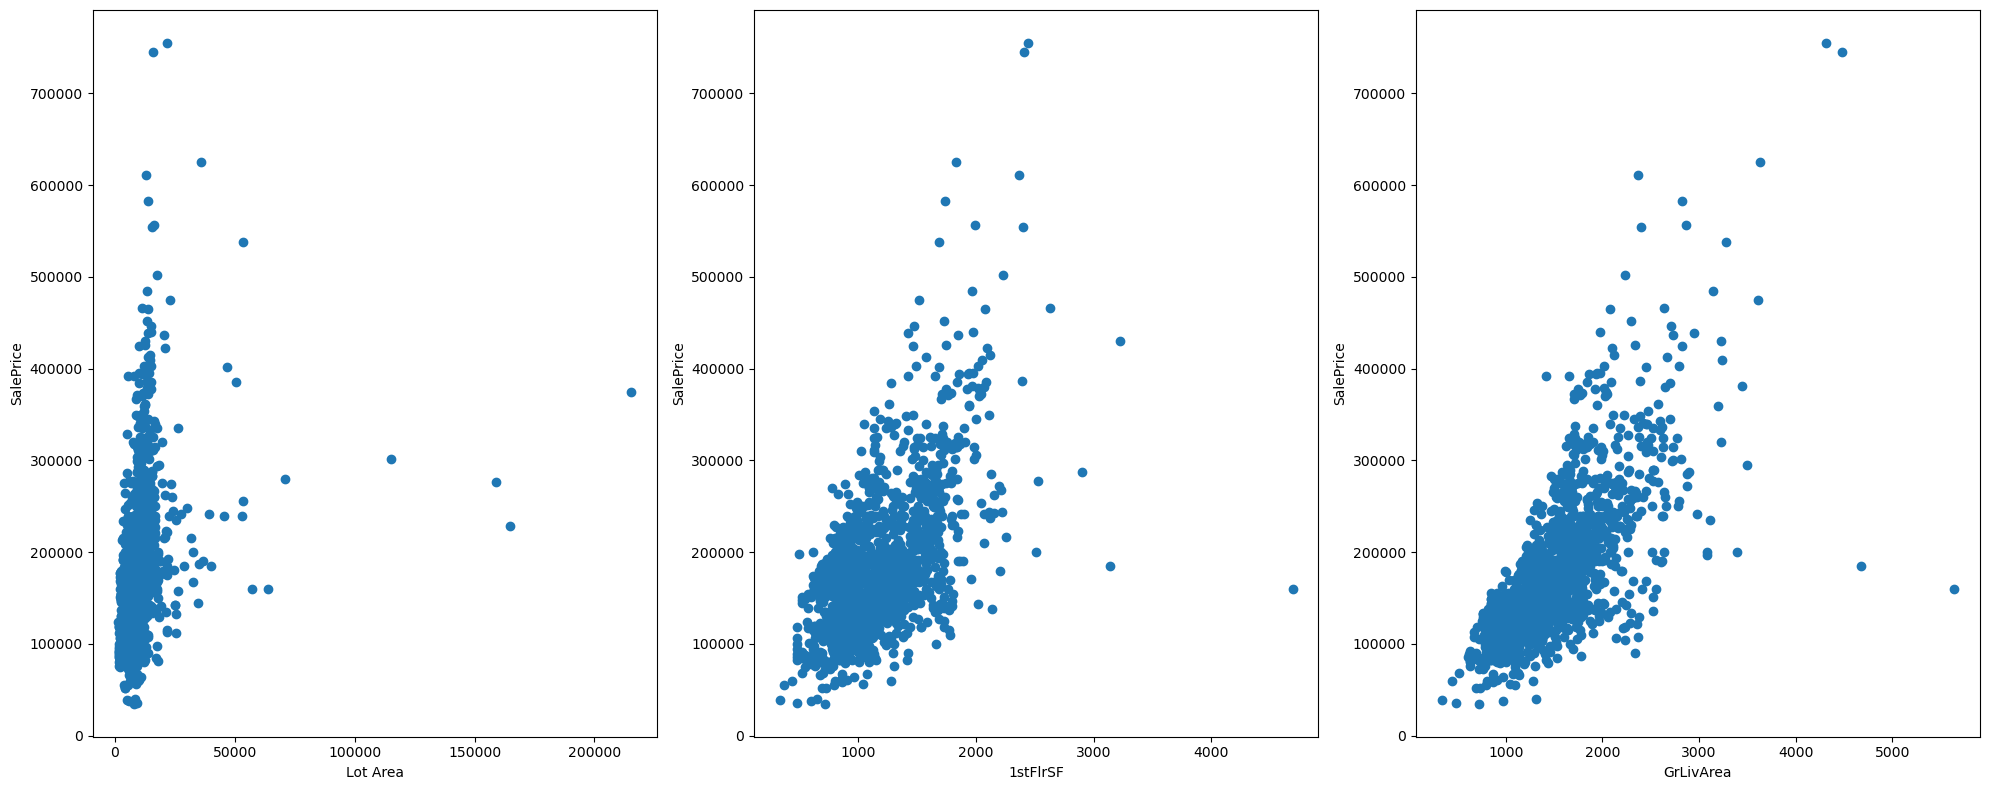

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

fig,ax = plt.subplots(ncols =3, figsize =  (20,8))

ax[0].scatter(ames['LotArea'],ames['SalePrice'])
ax[0].set_xlabel("Lot Area")
ax[0].set_ylabel("SalePrice")

ax[1].scatter(ames['1stFlrSF'],ames['SalePrice'])
ax[1].set_xlabel('1stFlrSF')
ax[1].set_ylabel("SalePrice")

ax[2].scatter(ames['GrLivArea'],ames['SalePrice'])
ax[2].set_xlabel('GrLivArea')
ax[2].set_ylabel("SalePrice")

plt.tight_layout()



1stFirSF and GrLivArea do seem as good candidates for linear regression. However Lot Area does not seem to be a good candidate .

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [11]:
y = ames ["SalePrice"]
x_baseline = ames ["GrLivArea"] 

In [13]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm

baseline_model = sm.OLS(y,sm.add_constant(x_baseline))

results = baseline_model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          4.52e-223
Time:                        12:51:45   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [14]:
# Your written answer here - interpret model results

"""
Fitted model is as shown below:

SalePrice = 18570 + 107.1304 GrLivArea

The model is statistically significant overall, with an F-statistic p-value well below 0.05
The model explains about 50% of the variance in SalePrice
The model coefficients (const and GrLivArea) are both statistically significant, with t-statistic p-values well below 0.05
If a house has a ground living area of 0, we would expect SalePrice to be about $18,570
For each increase of 1 in Ground living Area, we see an associated increase in Sale Price of about $107.13

"""

'\nFitted model is as shown below:\n\nSalePrice = 18570 + 107.1304 GrLivArea\n\nThe model is statistically significant overall, with an F-statistic p-value well below 0.05\nThe model explains about 50% of the variance in SalePrice\nThe model coefficients (const and GrLivArea) are both statistically significant, with t-statistic p-values well below 0.05\nIf a house has a ground living area of 0, we would expect SalePrice to be about $18,570\nFor each increase of 1 in Ground living Area, we see an associated increase in Sale Price of about $107.13\n\n'

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [15]:
# define X

X = ames[["LotArea", "1stFlrSF", "GrLivArea"]]

In [17]:
# fit model and display results

updated_model = sm.OLS(y, sm.add_constant(X))
results_updated = updated_model.fit()
print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.57e-262
Time:                        13:45:48   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [ ]:
# interpret model results. Does this model seem better than the previous one?

"""
Fitted model is as shown:

SalePrice = -14310 + 0.2841LotArea + 60.28661stFlrSF + 80.6061GrLivArea


The model is statistically significant overall, with an F-statistic p-value well below 0.05
The model explains about 57% of the variance in SalePrice, slightly better than the previous one.
The model coefficients (const, GrLivArea, 1stFlrSF) are statistically significant, with t-statistic p-values well below 0.05.
However, Lot Area is not.
If a house has a ground living area,lot area and 1st Floor square feet of 0, we would expect SalePrice to be about -$14,310

"""

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

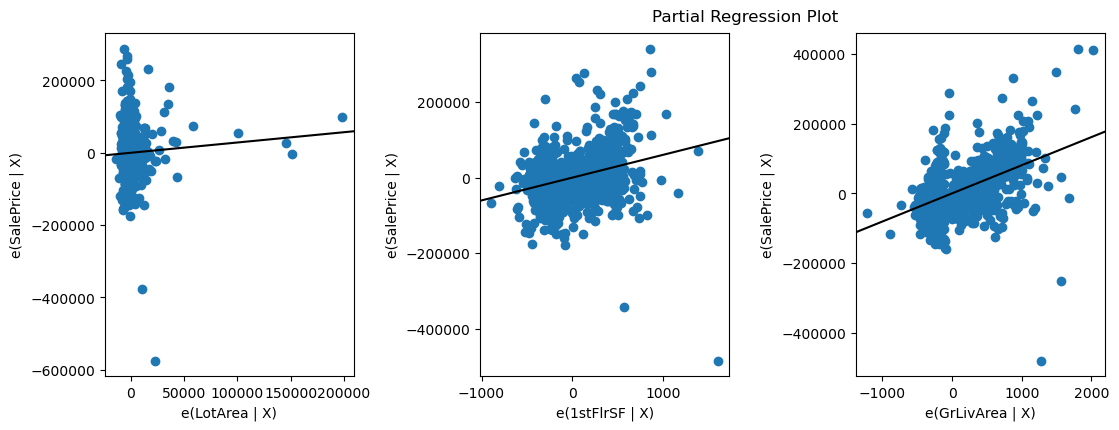

In [18]:
# create partial regression plots for each predictor

fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results_updated,
    exog_idx=list(X.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

In [19]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?


"""
For the three, we are observing a cluster of points which probably tells us that we added a lot more predictor variables
than we need  in order to explain the change in the target variable. Also, this coincided with what we observed in step 1,
where the cluster was observed in the separate variables themselves, with the most visible cluster being the
Lot Area.

"""

'\nFor the three, we are observing a cluster of points which probably tells us that we added a lot more predictor variables\nthan we need to in order to explain the change in the target variable. Also, this coincided with what we observed in step 1,\nwhere the cluster was observed in the separate variables themselves, with the most visible cluster being the\nLot Area.\n\n'

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [23]:
#import linear regression from scikit-learn and create and fit model

from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)



LinearRegression()

In [24]:
# compare R-Squared


print(f"""
StatsModels R-Squared:    {results_updated.rsquared}
scikit-learn R-Squared:   {sklearn_model.score(X, y)}
""")


StatsModels R-Squared:    0.5649801771384368
scikit-learn R-Squared:   0.5649801771384368



In [25]:
# compare intercept and coefficients

print(f"""
StatsModels intercept:     {results_updated.params["const"]}
scikit-learn intercept:    {sklearn_model.intercept_}

StatsModels coefficients:  {results_updated.params[1:].values}
scikit-learn coefficients: {sklearn_model.coef_}
""")


StatsModels intercept:     -14313.408857494374
scikit-learn intercept:    -14313.408857494593

StatsModels coefficients:  [ 0.28413359 60.28664625 80.60605834]
scikit-learn coefficients: [ 0.28413359 60.28664625 80.60605834]



## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.